In [1]:
%matplotlib inline

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'analysis'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'session'))

import numpy as np
from imports import *
from matplotlib.patches import ConnectionPatch
from scipy.stats import pearsonr
from target import build_tgt_matrix
np.set_printoptions(suppress=True)

import nbimporter
from functions import get_spike_counts, plot_tgt_bgr_psth, plot_psth_by_metric

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## 2.1 A1 single units exhibit micro-structure in response to target / background

In [7]:
source = '/home/sobolev/nevermind/Andrey/data'
example_units = {
    #'009266_hippoSIT_2023-04-17_17-04-17': ['1-2', '1-4', '1-5', '1-6', '1-10', '1-12', '1-13', '1-14', '2-2'],
    '009266_hippoSIT_2023-04-18_10-10-37': ['2-12', '2-13', '2-14', '2-5', '2-7', '2-8'],#['1-12', '1-13', '1-6']#, '2-12', '2-13', '2-14', '2-5', '2-7', '2-8'],
    '009266_hippoSIT_2023-04-18_17-03-10': ['1-18', '1-7', '2-2', '2-3', '2-11'],
}

unit_count = np.array([len(vals) for vals in example_units.values()]).sum()
unit_count

11

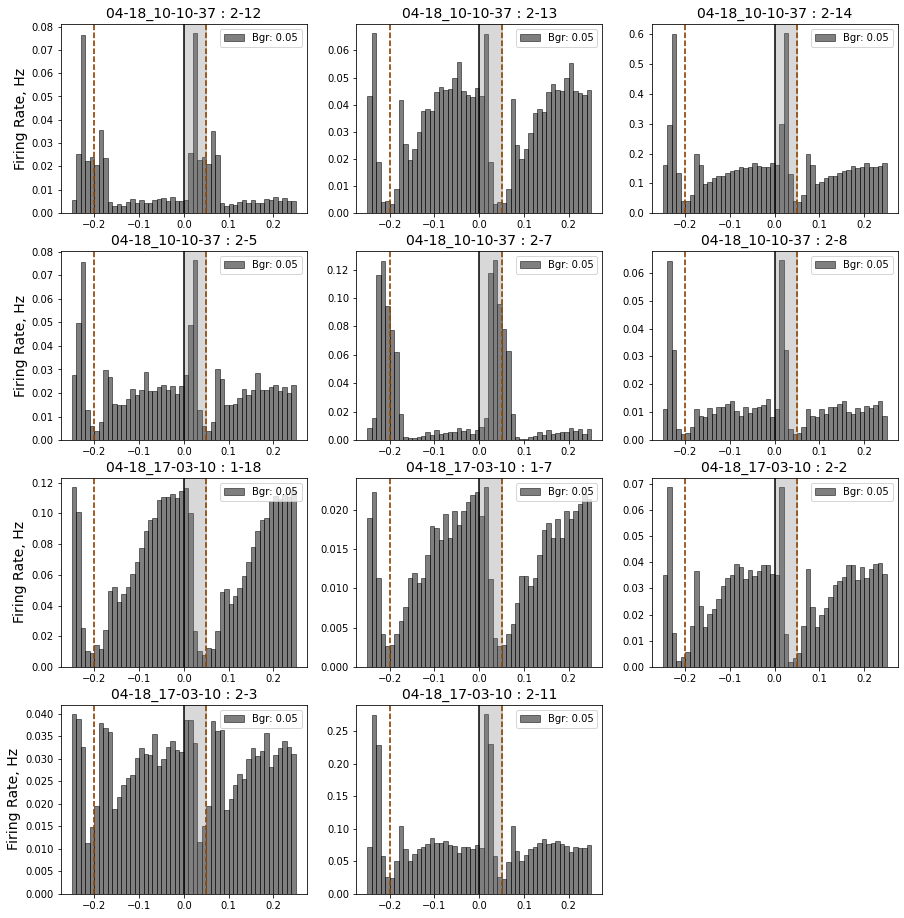

In [8]:
fig = plot_tgt_bgr_psth(example_units)
fig.savefig(os.path.join(report, 'reporting', 'TGT_micro.pdf'))

### Figure notes: response micro-structure can be separated into different components

    Neuronal responses (PSTH) to target (green) / backgound (gray) for selected neurons.
    Gray shaded area - pulse duration (50 ms).
    Note modulation by the relevant sound differ in time relative to the pulse onset. 
    Let's name these phases as:
        - On           ~15-25  ms  Examples: almost all except 1-10
        - Off          ~30-75  ms  Examples: 2-12, 1-13 etc.
        - post-early   ~75-95  ms  Examples: 2-2, 2-3, 2-11, 1-6
        - post-late    ~95-175 ms  Examples: 2-11, 2-13, 2-14, 2-8 etc.
    Note each response phase can be either enhanced or suppressed by the target.

## 2.2. AEP P1 state is modulated by ON-phase responsive units

In [25]:
example_units = {
#     '009266_hippoSIT_2023-04-17_17-04-17': [
#         '1-2', '1-3', '1-4', '1-5', '1-6', '1-9', '1-12', '1-13', '1-15', '2-2', '2-3'
#     ],
    '009266_hippoSIT_2023-04-18_10-10-37': [
       '1-2', '1-3', '1-4', '1-9', '1-10', '2-2', '2-5', '2-7', '2-8', '2-11', '2-12'
    ],
#     '009266_hippoSIT_2023-04-18_17-03-10': [
#        '1-2', '1-3', '1-6', '1-8', '1-9', '1-10', '1-12', '1-13', '2-2', '2-5', '2-6'
#     ],
}

unit_count = np.array([len(vals) for vals in example_units.values()]).sum()
unit_count

11

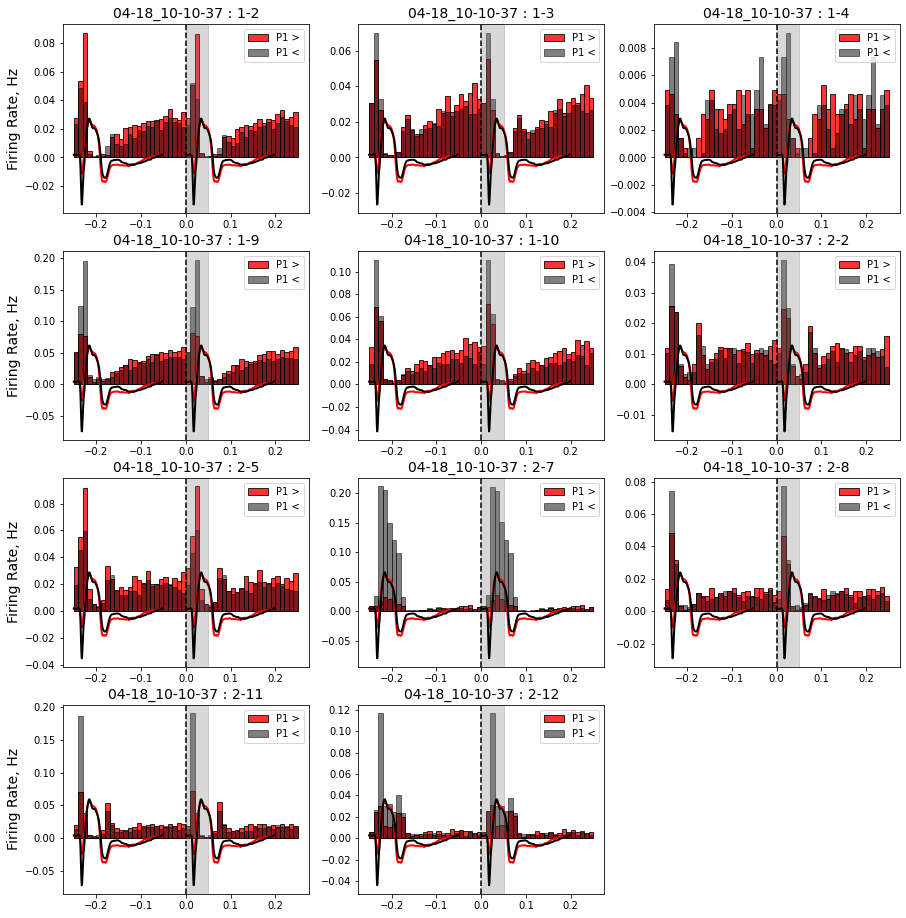

In [26]:
fig = plot_psth_by_metric('A1', 'P1', example_units)
#fig.savefig(os.path.join(report, 'reporting', 'AEPs_P1_high_low_A.pdf'))

### Figure notes:

    PSTH for selected ON-response units (3 sessions) separated by the AEP P1 state (high / low).
    Red: AEP P1 (z-smoothed) above the mean - high; Black: AEP P1 (z-smoothed) below the mean - low.
    Mean AEP profile for high / low state are shown on top of PSTH in red / black respectively.
    Note strong modulation of the ON-response depending on the state.
    Note modulation can be positive (almost all cells) or negative (04-18_10-10-37 : 1-2, 2-5).
    Note in some cells P1 modulation is correlated with post-phase modulation (04-18_10-10-37 : 1-2, 04-17_17-04-17 : 1-6).
    Note high/low P1 state has almost no influence on the other components of the AEP profile.

## 2.3. AEP N1 state is modulated by OFF-response units

In [43]:
example_units = {
#     '009266_hippoSIT_2023-04-17_17-04-17': [
#         '1-2', '1-6', '1-9', '1-10', '1-11', '1-13', '1-15'
#     ],
#     '009266_hippoSIT_2023-04-18_10-10-37': [
#         '1-5', '1-8', '2-3', '2-10', '2-12'
#     ],
    '009266_hippoSIT_2023-04-18_17-03-10': [
        '1-2', '1-7', '1-11', '1-12', '1-16', '1-18', '2-3', '2-5', '2-9'
    ],
}

unit_count = np.array([len(vals) for vals in example_units.values()]).sum()
unit_count

9

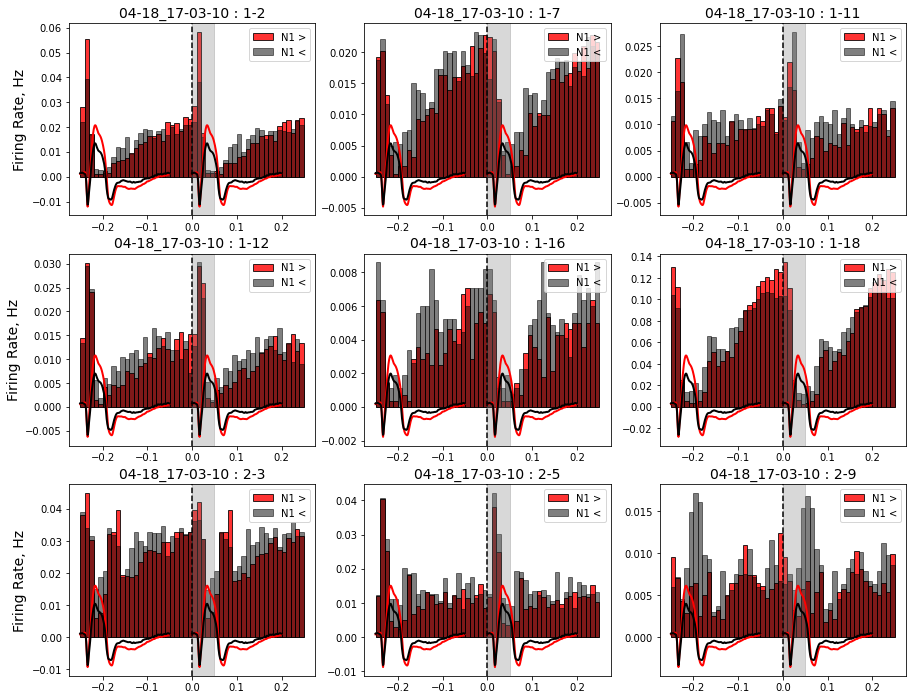

In [44]:
fig = plot_psth_by_metric('A1', 'N1', example_units)
#fig.savefig(os.path.join(report, 'reporting', 'AEPs_N1_high_low.pdf'))

### Figure notes:

    PSTH for selected OFF-response units (3 sessions) separated by the AEP N1 state (high / low).
    Red: AEP N1 (z-smoothed) above the mean - high; Black: AEP N1 (z-smoothed) below the mean - low.
    Mean AEP profile for high / low N1 state are shown on top of PSTH in red / black respectively.
    Note some units are strongly modulated int the OFF-phase of the response depending on the state.
    Note in many cells N1 modulation is correlated with post-phases modulation (after the OFF-response).
    Note high/low N1 state is correlated with high/low P3 state in different sessions (to be explored).

## 2.4. AEP P2 state is modulated by post-early response units

In [33]:
example_units = {
    '009266_hippoSIT_2023-04-17_17-04-17': [
        '1-7', '1-11', '1-12',   # '1-10', '1-13', '1-14',
    ],
    '009266_hippoSIT_2023-04-18_10-10-37': [
         '1-3', '1-6', '1-8', '2-2', '2-3', '2-4', '2-6', '2-9', '2-10', '2-11', '2-13', # '2-14', 
    ],
    '009266_hippoSIT_2023-04-18_17-03-10': [
        '1-18', '2-11', '2-2', '2-7', '2-9' # '1-13', '2-3', '2-4', '2-6', 
    ],
    '009266_hippoSIT_2023-04-19_10-33-51': [
        '1-2', '1-3', '2-2', '2-5', '2-6'
    ]
}

unit_count = np.array([len(vals) for vals in example_units.values()]).sum()
unit_count

24

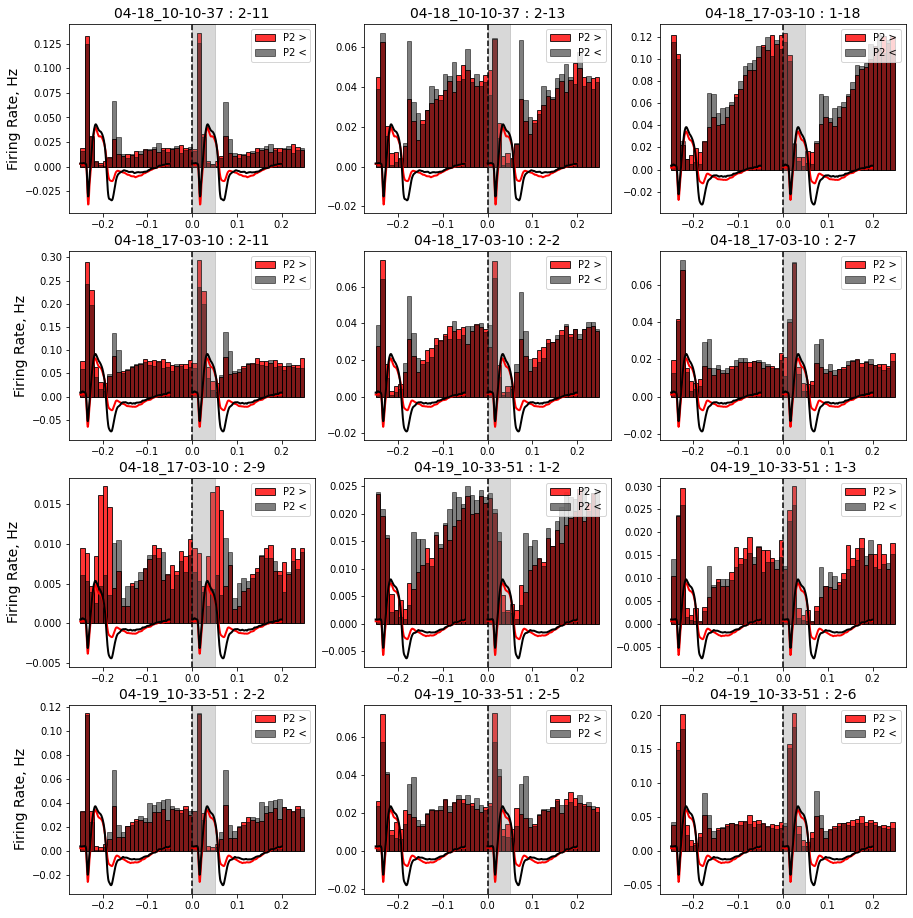

In [32]:
fig = plot_psth_by_metric('A1', 'P2', example_units)
#fig.savefig(os.path.join(report, 'reporting', 'AEPs_P2_high_low.pdf'))

### Figure notes:

    PSTH for selected post-early response units (4 sessions) separated by the AEP P2 state (high / low).
    Red: AEP P2 (z-smoothed) above the mean - high; Black: AEP P2 (z-smoothed) below the mean - low.
    Mean AEP profile for high / low P2 state are shown on top of PSTH in red / black respectively.
    Note some units are strongly modulated int the post-early phase of the response depending on the state.
    Note in many cells P2 modulation is correlated with OFF modulation.
    Note high/low P2 state is only slightly correlates with high/low P3 state in different sessions (to be explored).

## 2.5. AEP P3 state is modulated by post-late response units

In [38]:
example_units = {
#     '009266_hippoSIT_2023-04-17_17-04-17': [
#         '1-7', # '1-3', '1-12'
#     ],
#     '009266_hippoSIT_2023-04-18_10-10-37': [
#         '1-2', '1-3', '1-6', '1-8', '1-9', '2-4', '2-6', '2-13', 
#         # '1-4', '1-5', '1-7', '2-2', '2-5', '2-9', '2-14', 
#     ],
    '009266_hippoSIT_2023-04-18_17-03-10': [
#         '1-5', '1-13', '1-18', 
        '2-2', '2-9'
        # '1-8', '1-14', '2-8', '1-16', 
    ],
    '009266_hippoSIT_2023-04-19_10-33-51': [
        '1-2', '1-3', '1-4', '1-5', '1-9', '1-11', '1-12', '1-13', '1-16', '1-19', 
        # '1-7', '1-8', '1-10', '1-14', '2-4', 
    ]
}

unit_count = np.array([len(vals) for vals in example_units.values()]).sum()
unit_count

12

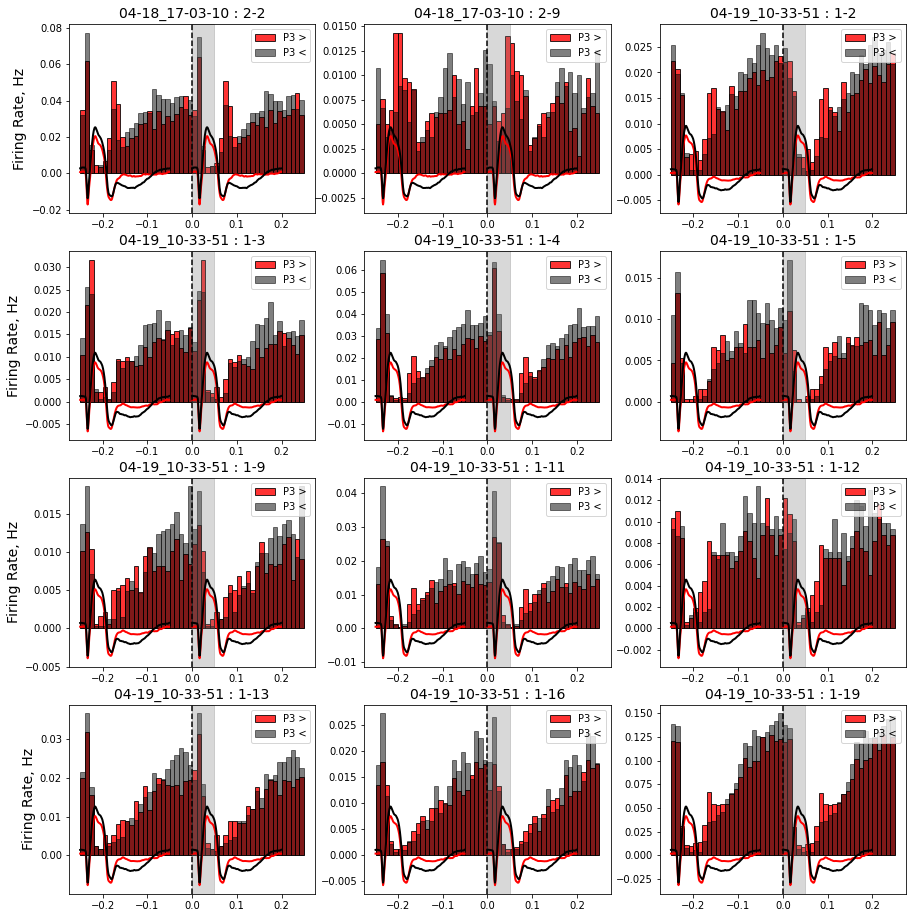

In [39]:
fig = plot_psth_by_metric('A1', 'P3', example_units)
#fig.savefig(os.path.join(report, 'reporting', 'AEPs_P3_high_low.pdf'))

### Figure notes:

    PSTH for selected post-early response units (4 sessions) separated by the AEP P3 state (high / low).
    Red: AEP P3 (z-smoothed) above the mean - high; Black: AEP P3 (z-smoothed) below the mean - low.
    Mean AEP profile for high / low P3 state are shown on top of PSTH in red / black respectively.
    Note some units are strongly modulated int the post-early phase of the response depending on the state.
    Note in many cells P3 modulation is correlated with OFF modulation.
    Note high/low P3 state slightly correlates with high/low N1 state in different sessions (to be explored).

## 2.6. SUMMARY: Population activity of ON, OFF, post-early and post-late phase neurons drive corresponding P1, N1, P2 and P3 components of evoked responses

### Hypothesis:

- early auditory areas (brainstem, IC, MGB, partly A1) encode feed-forward auditory signals with:
   - On-cells    (Uon)    - probably excitatory 
   - Off-cells   (Uoff)   - probably excitatory 
   - Tonic cells (Utonic) - probably inhibitory
   (Malone, Semple, 2015)
- these cells establish random synaptic connections with neurons higher auditory areas (A1, AAF, AuD etc.) such that a sigle cell can get all three types of inputs (although with different weights w)
- then single cell firing (V) can be described as
    V = w_on * Uon + w_off * Uoff - w_tonic * Utonic

In [41]:
# To be implemented
# 1. Find the best way to separate neurons in ON, OFF, post-early and post-late phase groups
# 2. Compute average population responses for each phase and correlate with strength of AEP components
# 3. Don't forget controls: show it works only for those groups, only for particular phase etc.

## 2.7 Unit selectivity matrices: which neurons have which components?

In [42]:
# To be implemented